In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#standardize data
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#clustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**Load data**

In [15]:
df = pd.read_excel("/kaggle/input/segmentation/CC_data.xlsx",index_col='Customer Key')

**print column names**

In [14]:
print(df.columns.to_list())

['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


**Read data**

In [16]:
df.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,,
87073,1,100000,2,1,1,0
38414,2,50000,3,0,10,9
17341,3,50000,7,1,3,4
40496,4,30000,5,1,1,4
47437,5,100000,6,0,12,3


In [19]:
print(df.nunique())
print(df.shape)

Sl_No                  655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64
(655, 6)


**create a copy of dataset**

In [20]:
dfCopy = df.copy()

**dropping SL_No:we do not need it**

In [22]:
df = df.drop(columns=['Sl_No'])

**Confirming S1_No was dropped**

In [23]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
87073,100000,2,1,1,0
38414,50000,3,0,10,9
17341,50000,7,1,3,4
40496,30000,5,1,1,4
47437,100000,6,0,12,3


**Standardization**

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**PCA**

In [26]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [29]:
pca.explained_variance_ratio_

array([0.45753002, 0.37439925, 0.06384537, 0.05558608, 0.04863928])

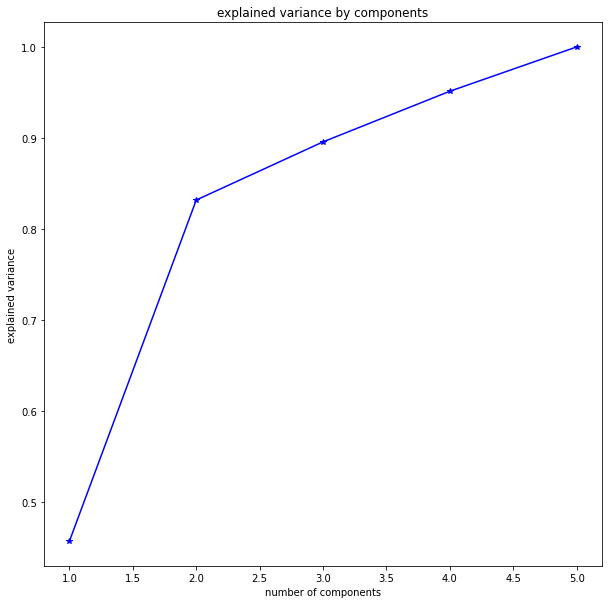

In [41]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,6,1),pca.explained_variance_ratio_.cumsum(),'b-*')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

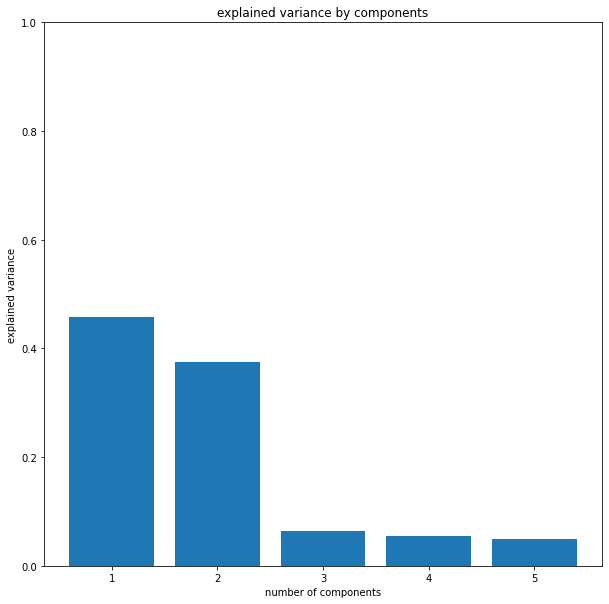

In [44]:
plt.figure(figsize=(10,10))
plt.bar(np.arange(1,6,1),pca.explained_variance_ratio_)
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.ylim([0,1])
plt.show()

**Proceed with 2 components :cumulative sum more than 80%**

In [46]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

df_PCA = pca.transform(df_scaled)

**Kmeans on PCA object**

**Determine optimal clusters:Elbow method**

In [47]:
from yellowbrick.cluster import KElbowVisualizer

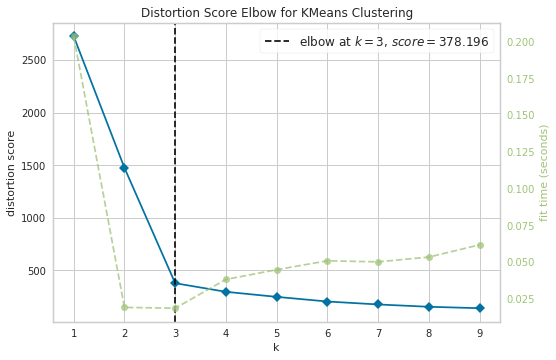

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
kmeans = KMeans()                       #instantiate kmeans
elbowPlot = KElbowVisualizer(kmeans,k=(1,10))   #instantiate visualizer
elbowPlot.fit(df_PCA)                #Fit visualizer to data
elbowPlot.show()                     #select k=3

**Quicker elbow plot**

In [56]:
from yellowbrick.cluster import kelbow_visualizer

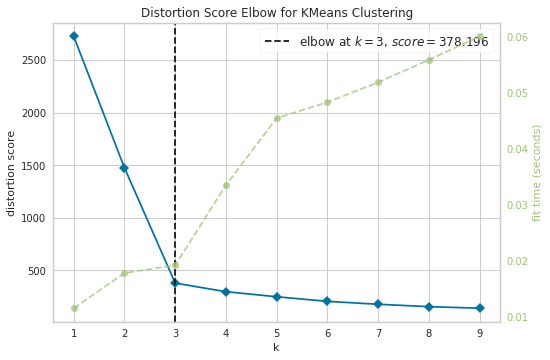

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10))

In [61]:
kelbow_visualizer(KMeans(random_state=1,init='k-means++'),df_PCA,k=(1,10))

**KMeans using three clusters**

In [62]:
kmeans_PCA = KMeans(n_clusters=3,random_state=1,init='k-means++').fit(df_PCA)

**Visualizing PCA output**

In [63]:
print(df_PCA[1:5,:])

[[-1.45462698  3.10118462]
 [ 0.53617261  0.82970507]
 [-0.35187133  0.12775433]
 [ 1.27287644  3.67789349]]


In [64]:
dfCopy.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,,
87073,1,100000,2,1,1,0
38414,2,50000,3,0,10,9
17341,3,50000,7,1,3,4
40496,4,30000,5,1,1,4
47437,5,100000,6,0,12,3


**Creating a dataframe of original df,kmeans and principal components**

In [66]:
kmeans_df = pd.concat([dfCopy.reset_index(drop=True),pd.DataFrame(df_PCA)],axis=1)

In [72]:
kmeans_df= kmeans_df.drop(columns='Sl_No')

In [73]:
kmeans_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,0,1
0,100000,2,1,1,0,0.519621,0.530952
1,50000,3,0,10,9,-1.454627,3.101185
2,50000,7,1,3,4,0.536173,0.829705
3,30000,5,1,1,4,-0.351871,0.127754
4,100000,6,0,12,3,1.272876,3.677893


**Naming PCA columns**

In [76]:
kmeans_df.columns.values[-2:] =['Component_1','Component_2']

In [77]:
kmeans_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Component_1,Component_2
0,100000,2,1,1,0,0.519621,0.530952
1,50000,3,0,10,9,-1.454627,3.101185
2,50000,7,1,3,4,0.536173,0.829705
3,30000,5,1,1,4,-0.351871,0.127754
4,100000,6,0,12,3,1.272876,3.677893


**Adding column of labels in kmeans_df**

In [80]:
kmeans_df['kmeansClusterLabels'] = kmeans_PCA.labels_

In [85]:
kmeans_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Component_1,Component_2,kmeansClusterLabels
0,100000,2,1,1,0,0.519621,0.530952,1
1,50000,3,0,10,9,-1.454627,3.101185,0
2,50000,7,1,3,4,0.536173,0.829705,1
3,30000,5,1,1,4,-0.351871,0.127754,1
4,100000,6,0,12,3,1.272876,3.677893,2


**visualizing cluster based on principal components**

Text(0.5, 1.0, 'KMeans visualization')

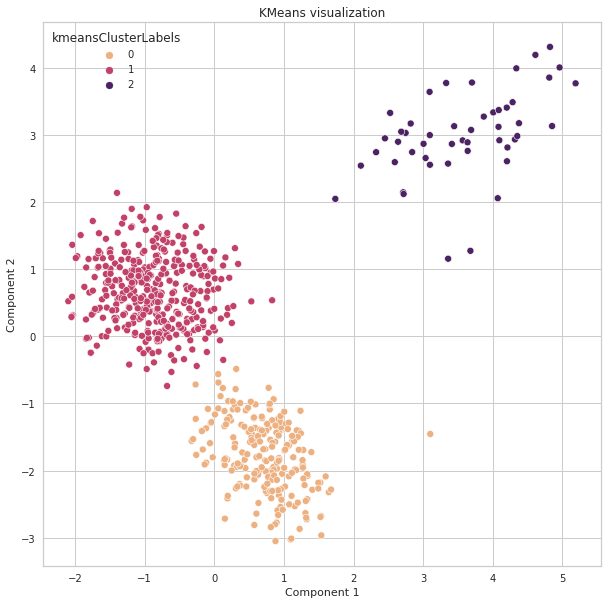

In [109]:
plt.figure(figsize=(10,10))
sns.scatterplot(kmeans_df['Component_2'],kmeans_df['Component_1'],hue= kmeans_df['kmeansClusterLabels'],palette='flare' )
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans visualization')

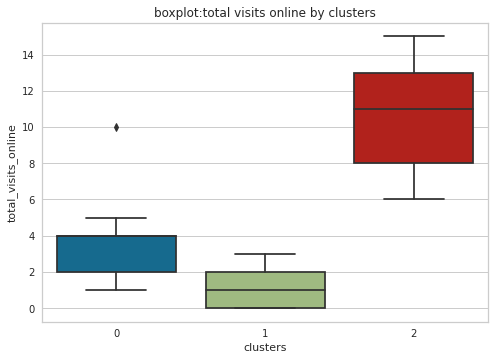

In [104]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_visits_online'])
plt.xlabel('clusters')
plt.ylabel('total_visits_online')
plt.title('boxplot:total visits online by clusters')
plt.show()

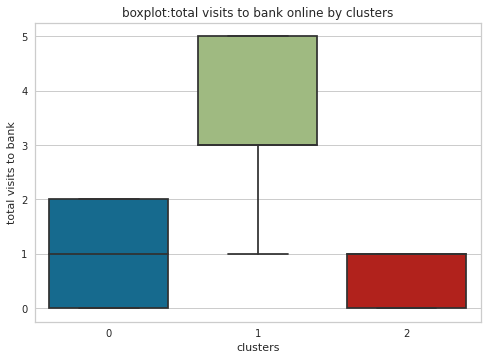

In [107]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_visits_bank'])
plt.xlabel('clusters')
plt.ylabel('total visits to bank')
plt.title('boxplot:total visits to bank online by clusters')
plt.show()

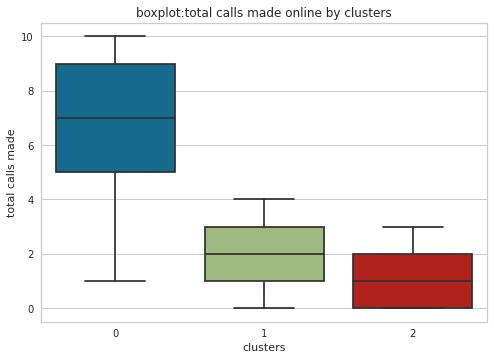

In [106]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Total_calls_made'])
plt.xlabel('clusters')
plt.ylabel('total calls made')
plt.title('boxplot:total calls made online by clusters')
plt.show()

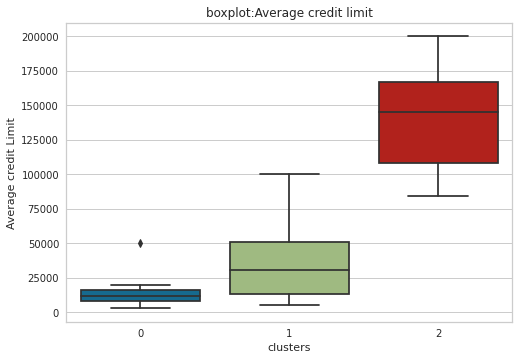

In [108]:
sns.boxplot( kmeans_df['kmeansClusterLabels'],kmeans_df['Avg_Credit_Limit'])
plt.xlabel('clusters')
plt.ylabel('Average credit Limit')
plt.title('boxplot:Average credit limit')
plt.show()